# Sumarised results from numerical experiments

In [75]:
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
from signals import *
from plots import *
from pylab import rcParams
rcParams['figure.figsize'] = 5, 3

In [76]:
def draw_plot(ax, data, edge_color, fill_color):
    bp = ax.boxplot(data, whis=[0, 95], patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)  

In [77]:
def my_degrees(rad):
    return rad*180/np.pi

To generate experiment results, run for example:

`exec(open("surface-tests.py").read())`

This notebook only reads the results from files and generates plots.

In [78]:
# listdir()

In [79]:
# results = np.empty((2,4,10))
all_errors = np.empty((4,10,100*13))

for n in range(3,8):
    for nl in [0,1,2,3]:
        code = str(n)+"_1_"+str(nl)
#         nsr = np.load('nsr_'+code+'.npy')
        errors = np.load('results/errors_'+code+'.npy')
#         params = np.load('params_'+code+'.npy')
#         results[0,nl,n] = np.degrees(np.percentile(errors, q=50))
#         results[1,nl,n] = np.degrees(np.percentile(errors, q=95))
        errors = errors.flatten()
        all_errors[nl,n,:] = errors

all_errors = my_degrees(all_errors)
all_errors[np.isnan(all_errors)]=20

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


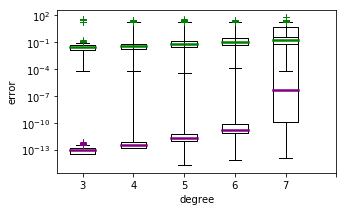

In [80]:
flierprops1 = dict(marker='+', markeredgecolor='purple')
medianprops1 = dict(linewidth=2.5, color='purple')
gp = dict(color='black')
flierprops2 = dict(marker='+', markeredgecolor='green')
medianprops2 = dict(linewidth=2.5, color='green')

max_degree = 8

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot(all_errors[0,3:max_degree,:].T, whis=[0, 95], flierprops=flierprops1, medianprops=medianprops1, boxprops=gp, whiskerprops=gp)
ax.boxplot(all_errors[3,3:max_degree,:].T, whis=[0, 95], flierprops=flierprops2, medianprops=medianprops2, boxprops=gp, whiskerprops=gp)
ax.set_yscale('log')
plt.xticks(range(1,max_degree-1),range(3,max_degree))
plt.xlabel("degree")
plt.ylabel("error")
plt.show()
fig.savefig('degree.pdf')


-inf
0.62038645069


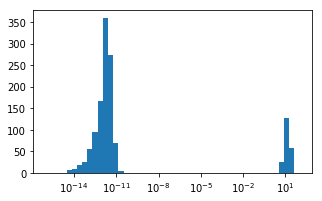

In [86]:
plt.hist(all_errors[0,5,:],  bins=np.logspace(-16, 2, 50))
print(np.mean(all_errors))
print(np.median(all_errors))
# plt.yscale('log', nonposy='clip')
plt.xscale('log', nonposy='clip')
plt.show()

In [93]:
results = np.empty((2,4,5,5))
all_errors = np.empty((4,5,5,100*13))
all_nsr = np.empty((4,5,5,100*13))

for (overs, idx) in zip([1,2,4,8], range(4)):
    for n in range(4,5):
        for nl in range(5):
            code = str(n)+"_"+str(overs)+"_"+str(nl)
            nsr = np.load('results/nsr_'+code+'.npy')
            errors = np.load('results/errors_'+code+'.npy')
    #         params = np.load('params_'+code+'.npy')
            errors[np.isnan(errors)]=1
            results[0,idx,nl,n] = np.degrees(np.percentile(errors, q=50))
            results[1,idx,nl,n] = np.degrees(np.mean(errors.flatten()))
            all_nsr[idx,nl,n,:] = nsr.flatten()
            all_errors[idx,nl,n,:] = errors.flatten()

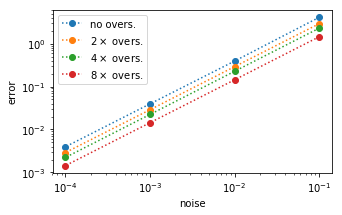

In [94]:
nse = 10.0**(-np.array(range(1,5)))
fig = plt.figure()
# plt.loglog(nse,results[0,:,1:,4].T, '--^')
plt.loglog(nse,results[0,:,1:,4].T, ':o')
# plt.semilogy(range(4),results[1,:,3:5], '^')
plt.xlabel("noise")
plt.ylabel("error")
plt.legend([r"no overs.",r"$2\times $ overs.",r"$4\times $ overs.", r"$8\times $ overs."], loc=2)
plt.show()
fig.savefig('oversampling.pdf')

(4, 5, 5, 1300)


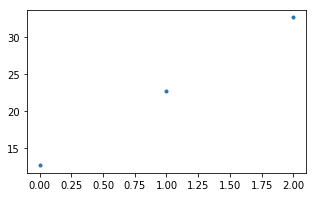

In [128]:
print(all_nsr.shape)
current = all_nsr[1, 1:4, 4, :]
plt.plot(-10*np.log10(np.mean(current,1)),'.')
plt.show()